In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fire_data = pd.read_csv('Algerian_forest_fires_dataset.csv')
fire_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
fire_data[fire_data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
fire_data.drop(122,inplace=True)

In [7]:
fire_data.loc[:122,'Region']=0
fire_data.loc[122:,'Region']=1

In [8]:
fire_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.9+ KB


In [10]:
fire_data['Region']=fire_data["Region"].astype(int)

In [11]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 38.9+ KB


In [12]:
fire_data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
# remove the null vallues
fire_data = fire_data.dropna().reset_index(drop=True)

In [14]:
fire_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
fire_data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
fire_data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
# drop the 122 row 
fire_data = fire_data.drop(122).reset_index(drop=True)

In [18]:
fire_data.iloc[122]

day                      1
month                    6
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 122, dtype: object

In [19]:
fire_data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
fire_data.columns = fire_data.columns.str.strip()
fire_data.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [22]:
fire_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [23]:
fire_data[['day','month','year','Temperature','RH','Ws']] = fire_data[['day','month','year','Temperature','RH','Ws']].astype(int)

In [24]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [25]:
objects = [feature for feature in fire_data.columns if fire_data[feature].dtype=='O']

In [26]:
objects.pop()

objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [27]:
fire_data[objects] = fire_data[objects].astype(float)

In [28]:
fire_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
## Now save the cleaned data into a csv file

fire_data.to_csv('Algerian_forest_fires_dataset_CLEANED.csv')

** EXPLORATORY DATA ANALYSIS **

In [30]:
fire_data_copy = fire_data.copy()

In [31]:
fire_data_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
## drop day,month , year

fire_data_copy= fire_data_copy.drop(['day','year','month'],axis=1)


In [33]:
fire_data_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [34]:
##Encoding the Classes columns
fire_data_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [35]:
fire_data_copy['Classes'] = fire_data['Classes'].str.strip()


In [36]:
fire_data_copy['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [37]:
fire_data_copy['Classes'] = np.where(fire_data_copy['Classes'].str.contains('not fire'),0,1)

In [38]:
fire_data_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [39]:
fire_data_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

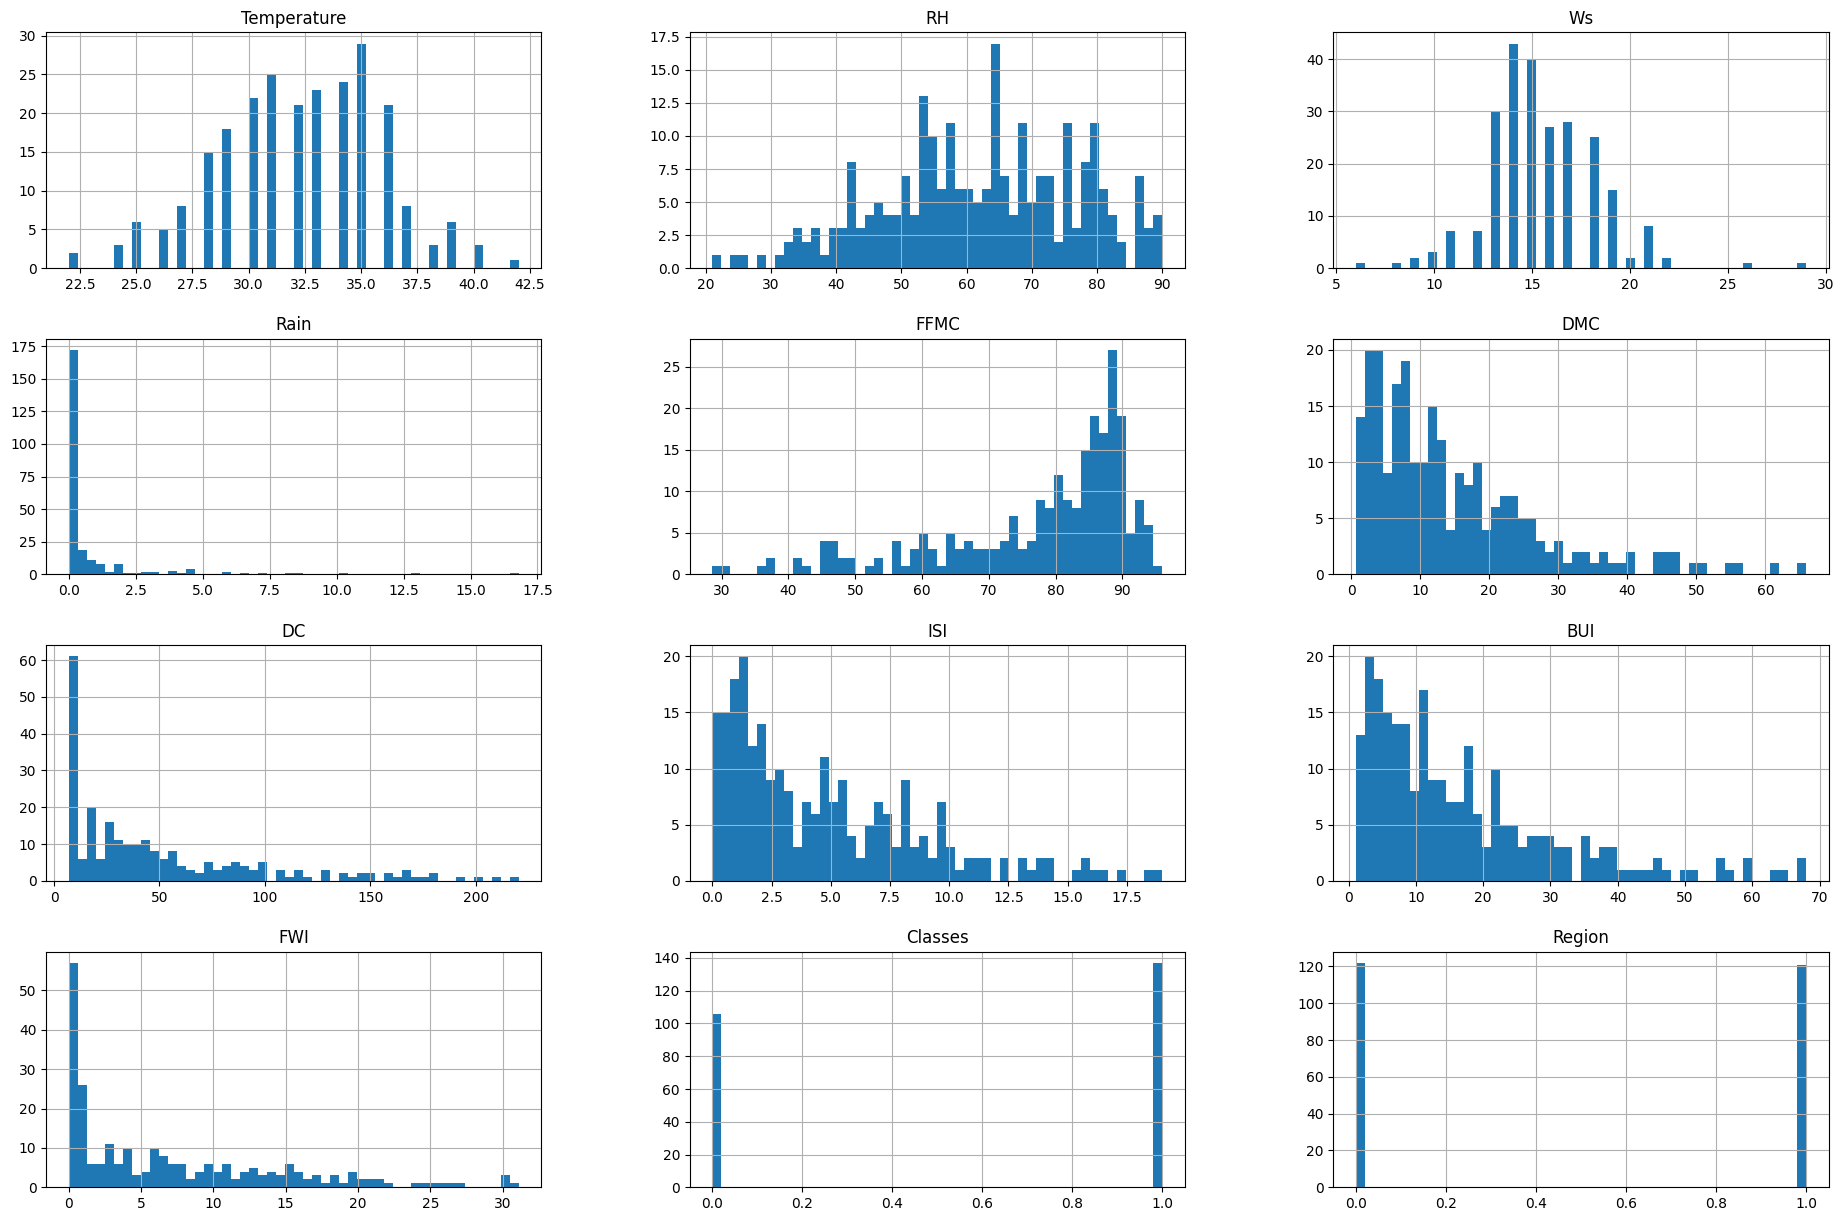

In [40]:
import seaborn as sns 
# plt.style.use('seaborn')
fire_data_copy.hist(bins=50,figsize=(23,15))
plt.show()
# sns.pairplot(fire_data_copy)

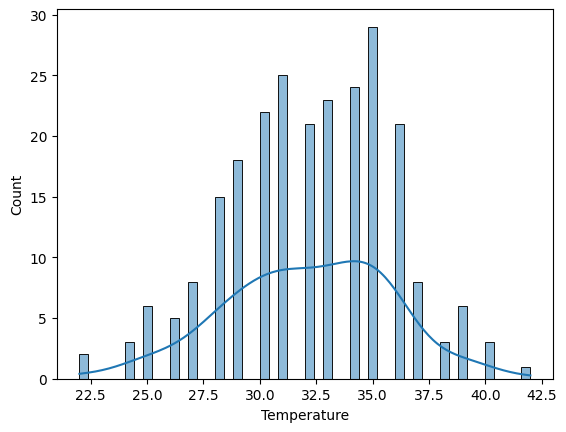

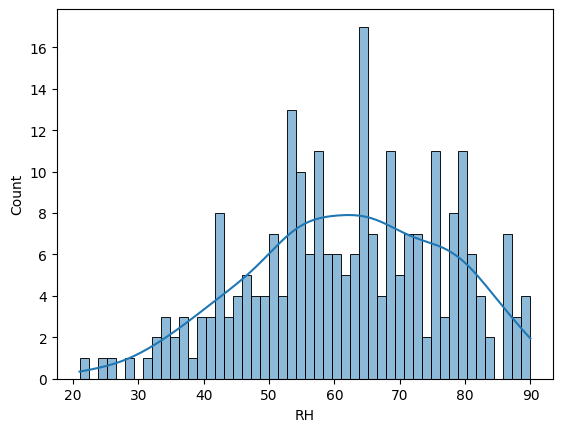

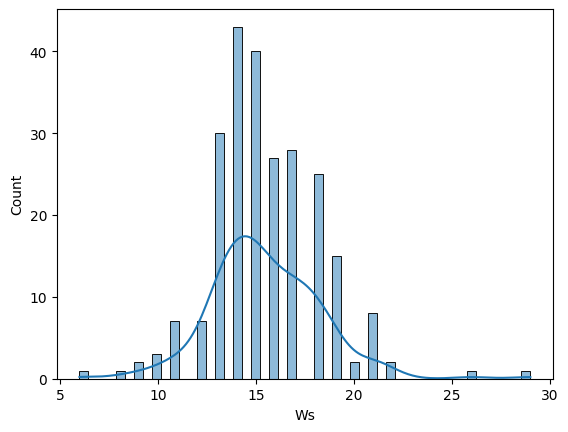

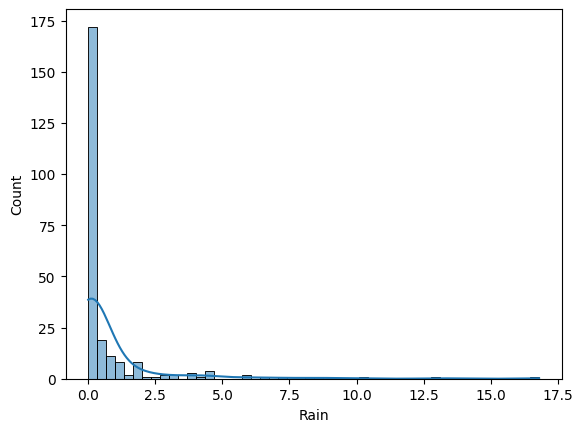

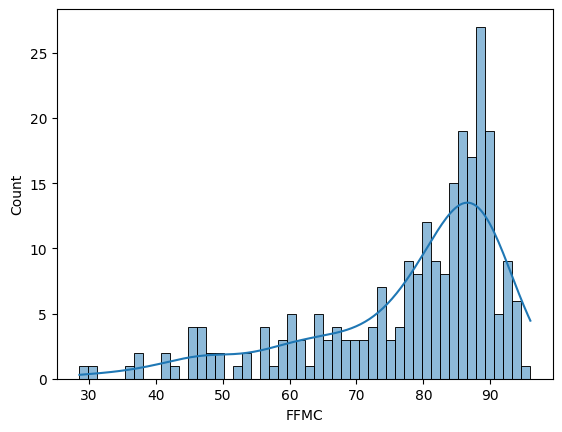

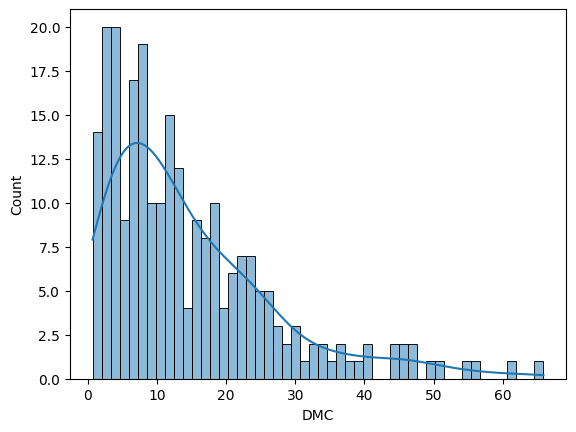

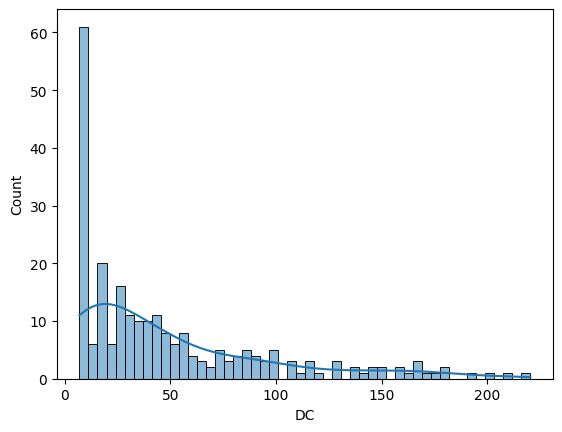

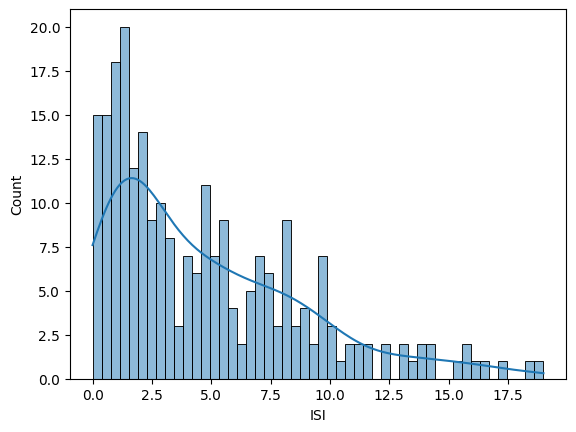

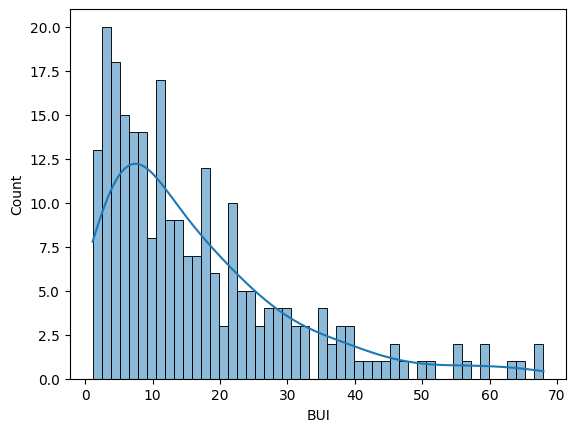

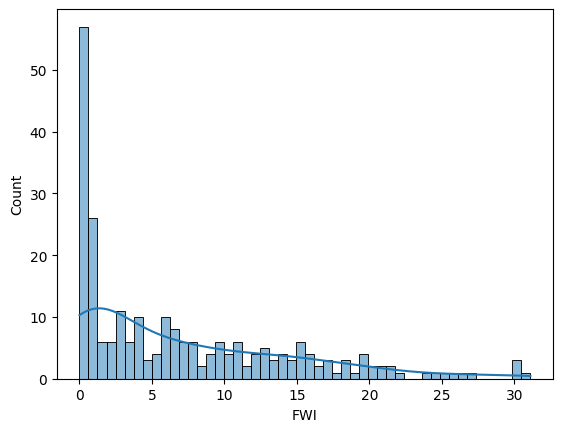

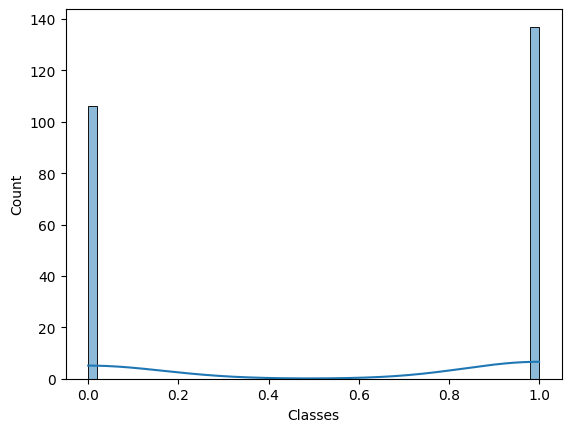

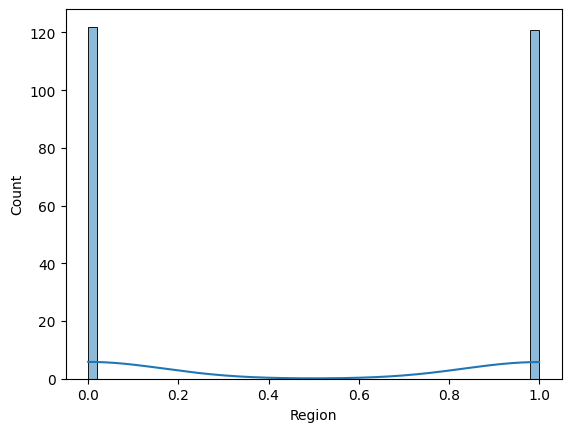

In [41]:
import seaborn as sns 

# plt.figure(figsize=(23,12))
for i in fire_data_copy.columns:
    sns.histplot(fire_data_copy[i],bins=50,kde=True)
    plt.show()

In [42]:
## percentage for pie Chart
percentage = fire_data_copy['Classes'].value_counts(normalize=True)*100
(percentage)

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

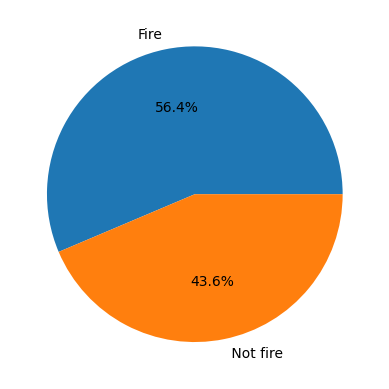

In [43]:
plt.pie(percentage,labels=['Fire',' Not fire'],autopct='%1.1f%%')
plt.show()

** CORREALTION **

In [44]:
fire_data_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

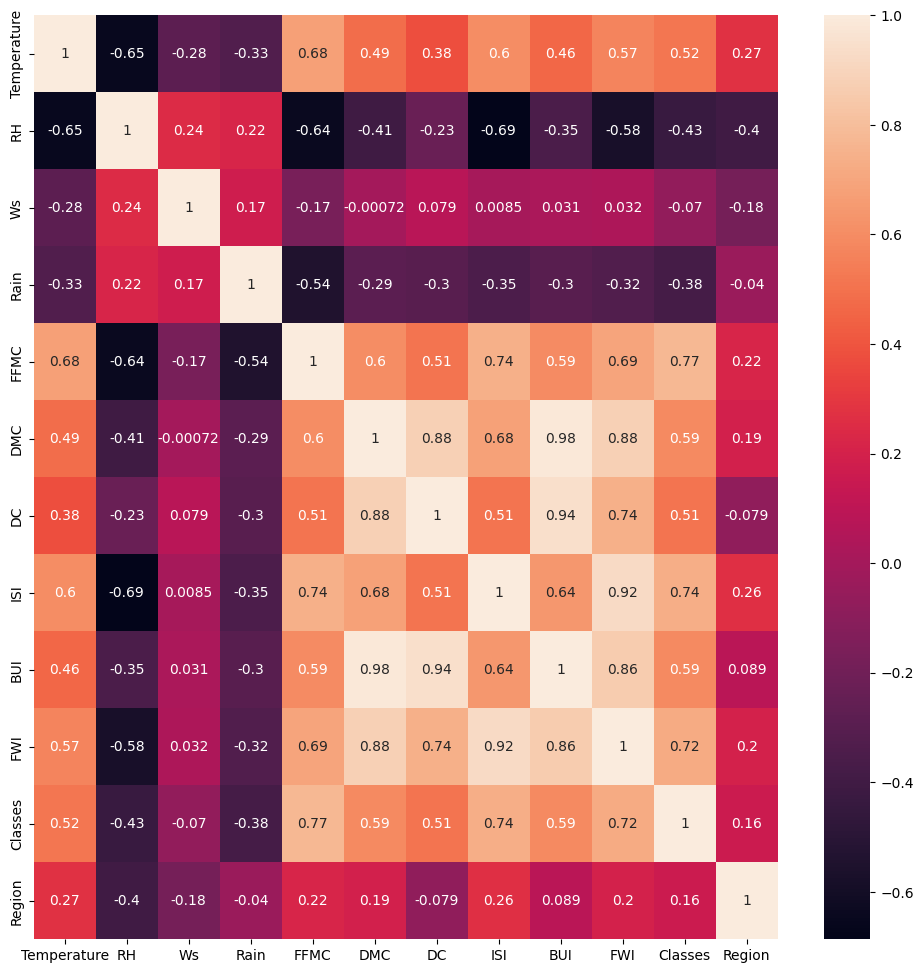

In [45]:

plt.figure(figsize=(12,12))
sns.heatmap(fire_data_copy.corr(),annot=True)

In [49]:
fire_data_temp = fire_data.loc[fire_data['Region']==1]
fire_data_temp['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [47]:
fire_data['Classes'] = np.where(fire_data['Classes'].str.contains('not fire'),'not fire','fire')

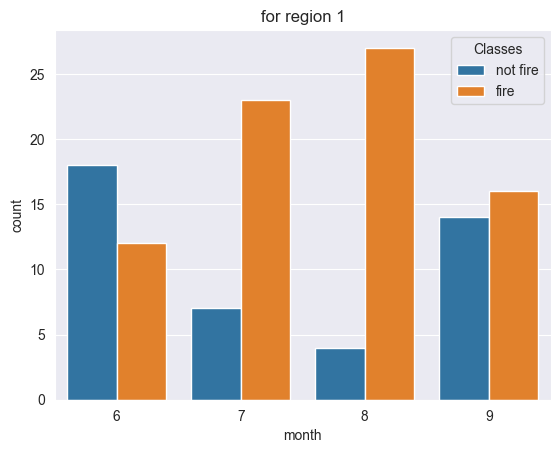

In [60]:

sns.countplot(x='month',hue='Classes',data=fire_data_temp)
sns.set_style('darkgrid')
plt.title("for region 1")
plt.show()

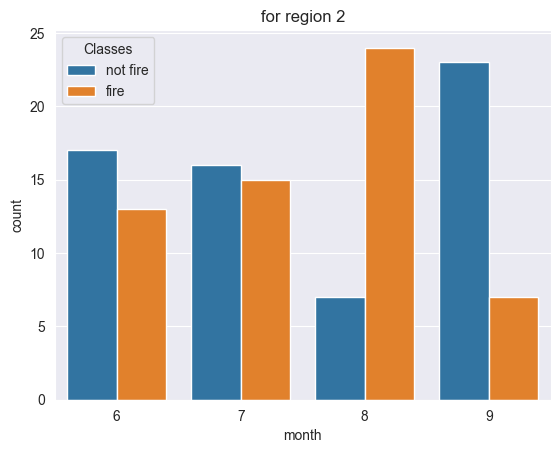

In [62]:
fire_data_temp2 = fire_data[fire_data['Region']==0]
sns.countplot(x='month',hue='Classes',data=fire_data_temp2)
sns.set_style('darkgrid')
plt.title("for region 2")
plt.show()

In [86]:
### model creation

df= pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.5+ KB


In [88]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [89]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)


In [90]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    int64  
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(9)
memory usage: 30.5 KB


In [92]:
df.corr()['Temperature']

Unnamed: 0     0.215829
day            0.097227
month         -0.056781
year                NaN
Temperature    1.000000
RH            -0.651400
Ws            -0.284510
Rain          -0.326492
FFMC           0.676568
DMC            0.485687
DC             0.376284
ISI            0.603871
BUI            0.459789
FWI            0.566670
Classes        0.516015
Region         0.269555
Name: Temperature, dtype: float64

<Axes: >

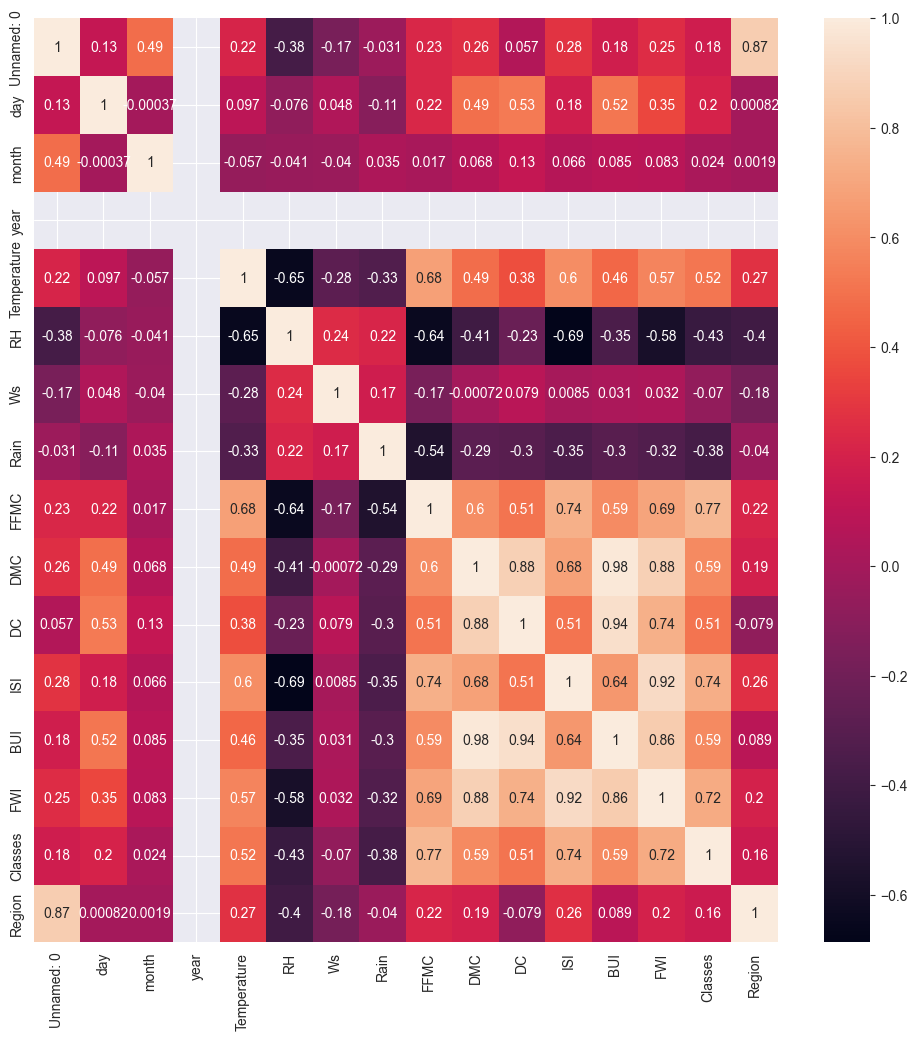

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [94]:
df.drop(['day','month','year','Unnamed: 0'],axis=1,inplace=True)

In [95]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [96]:
## independent and dependent features
X= df.drop('FWI',axis=1)
Y = df['FWI']

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [116]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [117]:
## feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [118]:
### avoid multicollinearity
## remove the column having correlation greater than the threshold thus reducing the number of dependent features

def correlation(data,threshold):
    col_set=set()
    corr_matrix = data.corr()
    #traversing column wise
    for i in range(len(corr_matrix.columns)): 
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_set.add(corr_matrix.columns[i])

    return col_set


In [119]:
corr_features = correlation(x_train,0.85)

In [120]:
corr_features

{'BUI', 'DC'}

In [121]:
x_train = x_train.drop(corr_features,axis=1)


In [122]:
x_test = x_test.drop(corr_features,axis=1)

In [123]:
x_train,x_test

(     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 97            29  74  19   0.1  75.8   3.6   2.1        0       0
 141           31  72  14   0.2  60.2   3.8   0.8        0       1
 192           40  31  15   0.0  94.2  22.5  16.6        1       1
 68            32  60  18   0.3  77.1  11.3   2.2        0       0
 119           32  47  14   0.7  77.5   7.1   1.8        0       0
 ..           ...  ..  ..   ...   ...   ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9   0.2        0       0
 14            28  80  17   3.1  49.4   3.0   0.4        0       0
 92            25  76  17   7.2  46.0   1.3   0.2        0       0
 179           34  59  16   0.0  88.1  19.5   7.4        1       1
 102           30  77  21   1.8  58.5   1.9   1.1        0       0
 
 [182 rows x 9 columns],
      Temperature  RH  Ws  Rain  FFMC   DMC  ISI  Classes  Region
 24            31  64  15   0.0  86.7  14.2  5.7        1       0
 6             33  54  13   0.0  88.2

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

x_train,x_train_scaled


(     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 97            29  74  19   0.1  75.8   3.6   2.1        0       0
 141           31  72  14   0.2  60.2   3.8   0.8        0       1
 192           40  31  15   0.0  94.2  22.5  16.6        1       1
 68            32  60  18   0.3  77.1  11.3   2.2        0       0
 119           32  47  14   0.7  77.5   7.1   1.8        0       0
 ..           ...  ..  ..   ...   ...   ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9   0.2        0       0
 14            28  80  17   3.1  49.4   3.0   0.4        0       0
 92            25  76  17   7.2  46.0   1.3   0.2        0       0
 179           34  59  16   0.0  88.1  19.5   7.4        1       1
 102           30  77  21   1.8  58.5   1.9   1.1        0       0
 
 [182 rows x 9 columns],
 array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
 

Text(0.5, 1.0, 'after standardization')

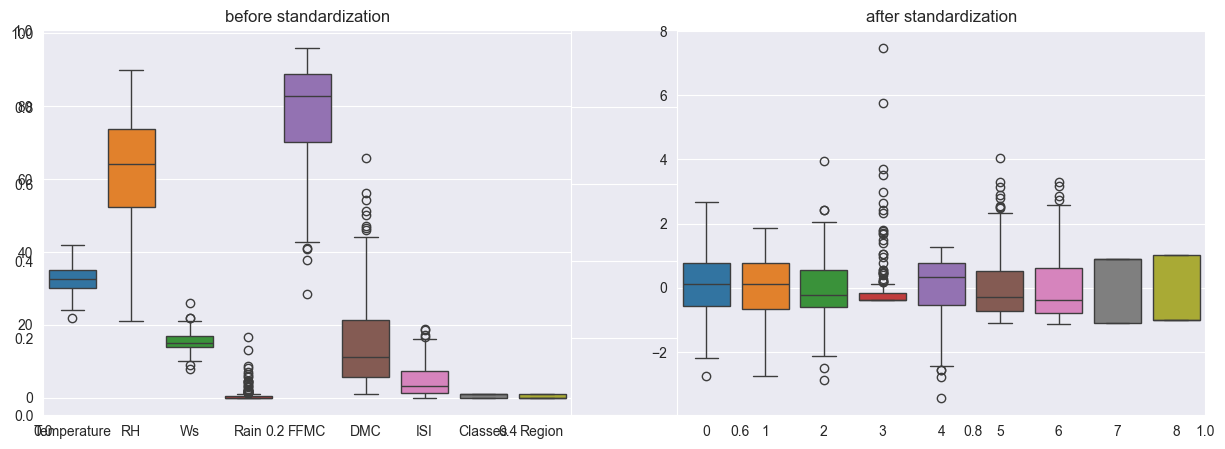

In [135]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("before standardization")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("after standardization")

In [136]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [137]:
linereg = LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression()

In [150]:
y_pred = linereg.predict(x_test_scaled)

In [151]:
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [152]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9847657384266951
0.5468236465249978


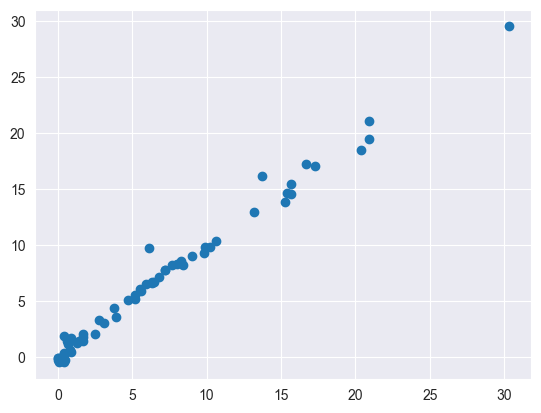

In [153]:
plt.scatter(y_test,y_pred)

In [156]:
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_predlasso = lasso.predict(x_test_scaled)

print(mean_absolute_error(y_test,y_predlasso))
print(r2_score(y_test,y_predlasso))

1.133175994914409
0.9492020263112388


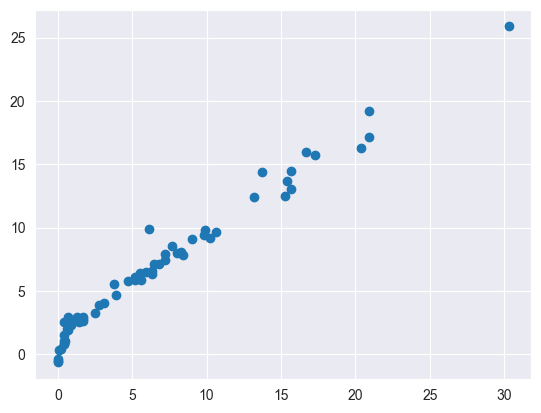

In [157]:
plt.scatter(y_test,y_predlasso)

CROSS VALIDATION IN LASSO

In [158]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv=5)
lcv.fit(x_train_scaled,y_train)
y_predlcv = lcv.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_predlcv))
print(r2_score(y_test,y_predlcv))


0.619970115826343
0.9820946715928275


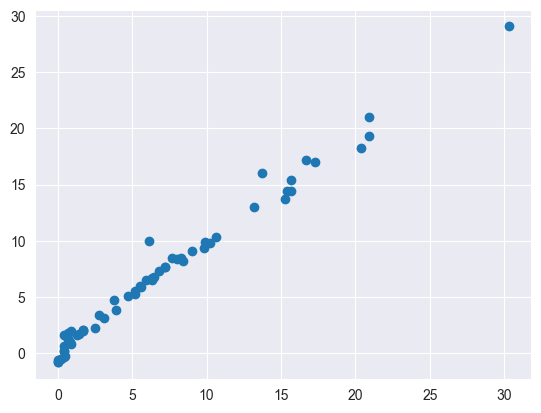

In [159]:
plt.scatter(y_test,y_predlcv)

In [160]:
from sklearn.linear_model import Ridge
rdge = Ridge()
rdge.fit(x_train_scaled,y_train)
y_predR = rdge.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_predR))
print(r2_score(y_test,y_predR))

0.5642305340105715
0.9842993364555512


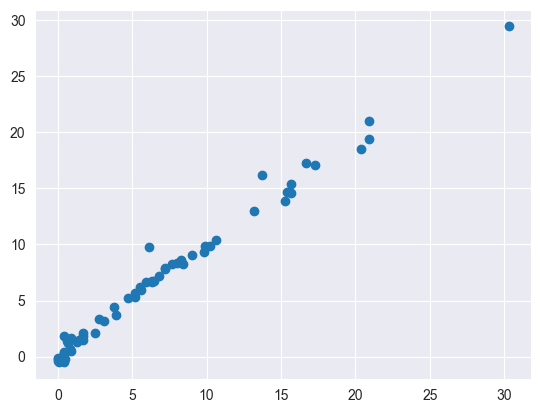

In [161]:
plt.scatter(y_test,y_predR)

In [162]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(cv=5)
rcv.fit(x_train_scaled,y_train)
y_predrcv = rcv.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_predrcv))
print(r2_score(y_test,y_predrcv))

0.5642305340105715
0.9842993364555512


In [165]:
rcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [163]:
from sklearn.linear_model import ElasticNet
eln = ElasticNet()
eln.fit(x_train_scaled,y_train)
y_predE = eln.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_predE))
print(r2_score(y_test,y_predE))

1.8822353634896005
0.8753460589519703


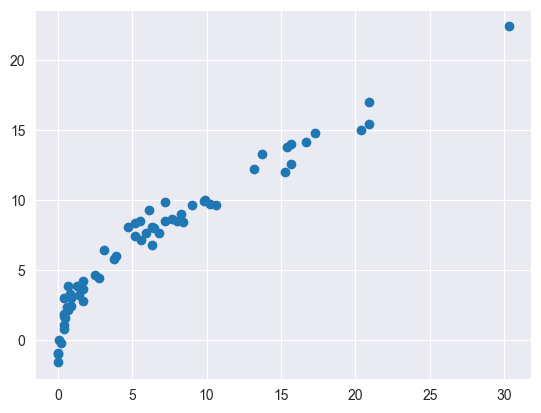

In [164]:
plt.scatter(y_test,y_predE)

In [166]:
from sklearn.linear_model import ElasticNetCV
elncv = ElasticNetCV()
elncv.fit(x_train_scaled,y_train)
y_predE = elncv.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_predE))
print(r2_score(y_test,y_predE))

0.6575946731430898
0.9814217587854941


In [167]:
sc

StandardScaler()

In [ ]:
## pickle the machine learning model and preprocessing model that is StandardScaler
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(rdge,open('ridge.pkl','wb'))


In [171]:
pickle.dump(linereg,open('regressor.pkl','wb'))